In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("sales_data.csv")

print("Original Columns:", df.columns.tolist())


df.columns = df.columns.str.strip().str.replace(' ', '_')
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')


df_cleaned = df.dropna()

print(df_cleaned.head())





Original Columns: ['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE']
    ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
10        10223               37     100.00                1  3965.66   
21        10361               20      72.55               13  1451.00   
40        10270               21     100.00                9  4905.39   
47        10347               30     100.00                1  3944.70   
51        10391               24     100.00                4  2416.56   

    ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
10 2004-02-20  Shipped       1         2     2004  ...   
21 2004-12-17  Shipped       4        12     2004  ...   
40 2004-07-19  Shipped       3      

In [25]:
df_cleaned = df.dropna(subset=['ORDERDATE', 'SALES', 'QUANTITYORDERED'])
print("Remaining rows:", len(df_cleaned))
df_cleaned.head()


Remaining rows: 2823


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,Total_Cost,Profit,Profit_Margin,Inventory_Days
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,10022,USA,NaN,Yu,Kwai,Small,2871.00,0.000000e+00,0.000000e+00,61
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,51100,France,EMEA,Henriot,Paul,Small,2765.90,4.547474e-13,1.644121e-16,24
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,75508,France,EMEA,Da Cunha,Daniel,Medium,3884.34,4.547474e-13,1.170720e-16,81
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,90003,USA,NaN,Young,Julie,Medium,3746.70,-4.547474e-13,-1.213728e-16,70
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,NaN,USA,NaN,Brown,Julie,Medium,4900.00,3.052700e+02,5.864633e-02,30


In [21]:
df_cleaned.to_csv("cleaned_sales_data.csv", index=False)


In [22]:
print("Missing COUNTRY:", df_cleaned['COUNTRY'].isna().sum())


Missing COUNTRY: 0


In [26]:

df['Total_Cost'] = df['QUANTITYORDERED'] * df['PRICEEACH']
df['Profit'] = df['SALES'] - df['Total_Cost']
df['Profit_Margin'] = df['Profit'] / df['SALES']

np.random.seed(42) 
df['Inventory_Days'] = np.random.randint(10, 100, size=len(df))


correlation = df[['Inventory_Days', 'Profit_Margin']].corr()
print("📊 Correlation Matrix:")
print(correlation)



📊 Correlation Matrix:
                Inventory_Days  Profit_Margin
Inventory_Days        1.000000       0.007487
Profit_Margin         0.007487       1.000000


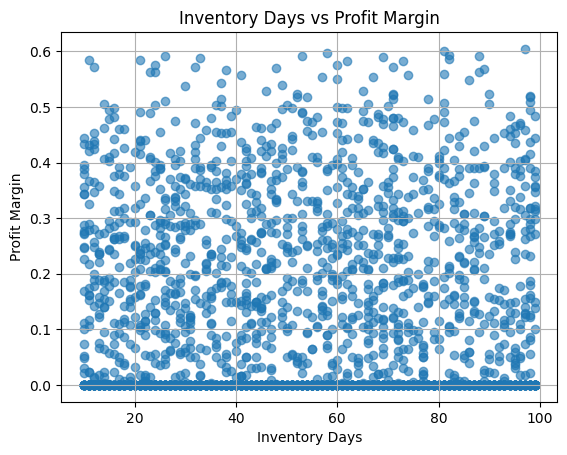

In [27]:
plt.scatter(df['Inventory_Days'], df['Profit_Margin'], alpha=0.6)
plt.title("Inventory Days vs Profit Margin")
plt.xlabel("Inventory Days")
plt.ylabel("Profit Margin")
plt.grid(True)
plt.show()

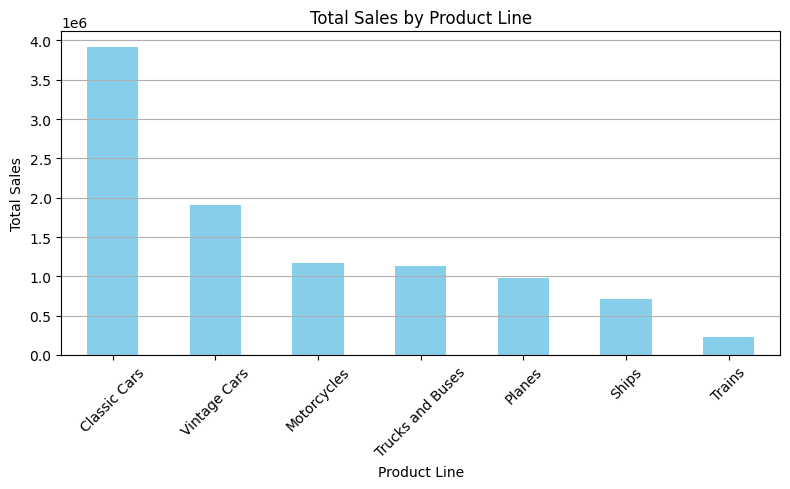

In [28]:
sales_by_productline = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)

sales_by_productline.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title("Total Sales by Product Line")
plt.ylabel("Total Sales")
plt.xlabel("Product Line")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


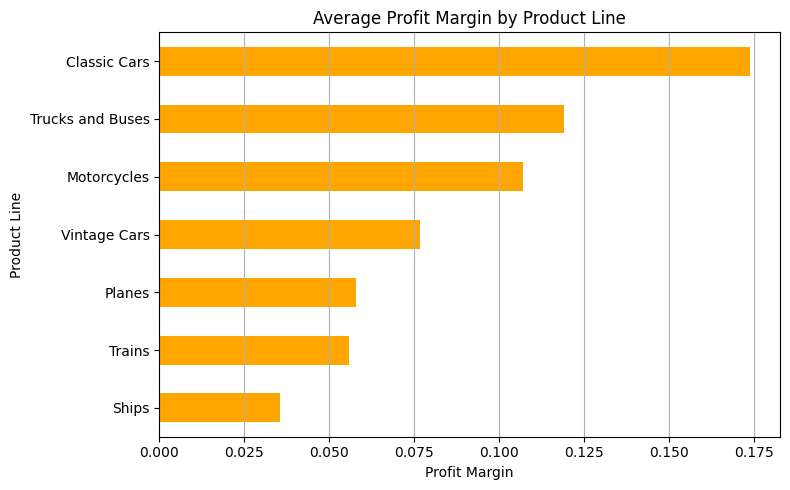

In [29]:
df['Profit'] = df['SALES'] - (df['QUANTITYORDERED'] * df['PRICEEACH'])
df['Profit_Margin'] = df['Profit'] / df['SALES']

margin_by_product = df.groupby('PRODUCTLINE')['Profit_Margin'].mean().sort_values()

margin_by_product.plot(kind='barh', figsize=(8, 5), color='orange')
plt.title("Average Profit Margin by Product Line")
plt.xlabel("Profit Margin")
plt.ylabel("Product Line")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


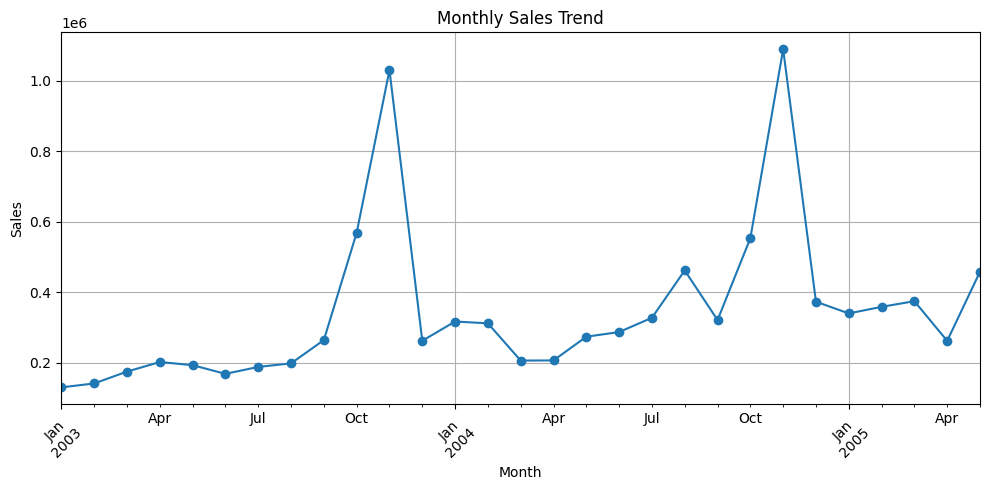

In [30]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')
monthly_sales = df.groupby(df['ORDERDATE'].dt.to_period('M'))['SALES'].sum()

monthly_sales.plot(kind='line', figsize=(10, 5), marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Month")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


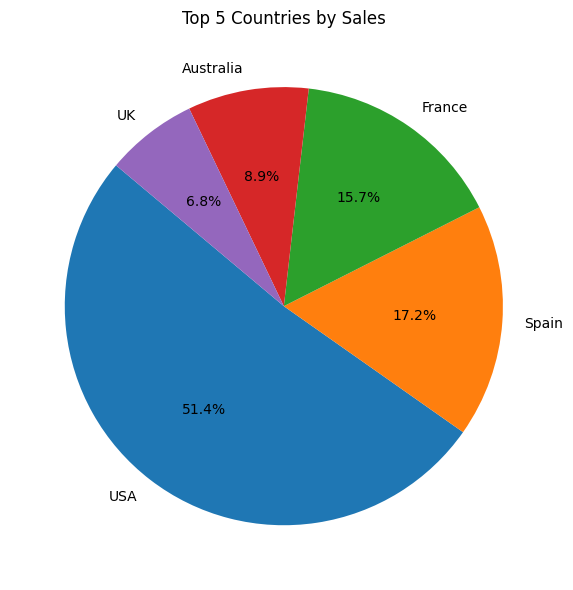

In [31]:
top_countries = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).head(5)

top_countries.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(6, 6))
plt.title("Top 5 Countries by Sales")
plt.ylabel("")
plt.tight_layout()
plt.show()
